*   Nama : Ihsan Ananda Pratama
*   Domisili : Kabupaten Jakarta Barat
*   Instansi : PT Indocyber Global Technology

# **Import Library**


In [1]:
import numpy as np
import zipfile,os
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import pickle
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import  OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# **Data Loading**

In [2]:
# Define dataframe
url = 'https://raw.githubusercontent.com/IhsanAnanda/PredictiveAnalytics/main/milknew.csv'
df = pd.read_csv(url)
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


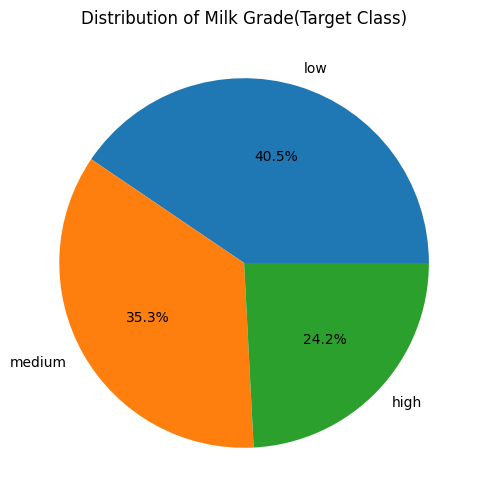

In [4]:
# Data plotting
target_counts = df['Grade'].value_counts()
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%')

# Add a title and description
ax.set_title('Distribution of Milk Grade(Target Class)')

# Show the plot
plt.show()

Dataset ini terdiri dari 3 target class dan 1059 baris data. Target class tersebut terdiri dari low, medium, high yang mengambarkan kualitas susu. Berdasarkan visualisasi menggunakan diagram lingkaran(pie chart) diatas yang dilampirkan dari 1059 data terdapat 40,5%(429 data) dimiliki oleh kelas low, 35.3%(374 data) dimiliki oleh kelas medium, dan 24.2%(256 data) dimiliki oleh kelas high.

# **Data Understanding**

*   Data Description

In [5]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


*   Replace 0 and 1 values, hal ini dilakukan untuk mempermudah analisis dataset

In [6]:
df.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [7]:
df['Taste'] = df['Taste'].replace({0: 'Bad', 1: 'Good'})
df['Odor'] = df['Odor'].replace({0: 'Bad', 1: 'Good'})
df.rename(columns={'Fat ': 'Fat'}, inplace=True)
df['Fat'] = df['Fat'].replace({0: 'Bad', 1: 'Good'})
df['Turbidity'] = df['Turbidity'].replace({0: 'Bad', 1: 'Good'})
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,Good,Bad,Good,Bad,254,high
1,6.6,36,Bad,Good,Bad,Good,253,high
2,8.5,70,Good,Good,Good,Good,246,low
3,9.5,34,Good,Good,Bad,Good,255,low
4,6.6,37,Bad,Bad,Bad,Bad,255,medium


*   Univariate Analysis

In [8]:
numerical_features = ['pH', 'Temprature', 'Colour']
categorical_features = ['Taste', 'Odor', 'Fat', 'Turbidity']

      Total Sample  Percentage
Good           579        54.7
Bad            480        45.3


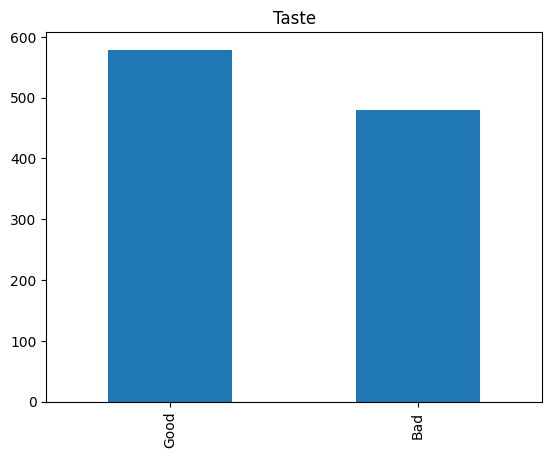

In [9]:
# Fitur Taste
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
result = pd.DataFrame({'Total Sample':count, 'Percentage':percent.round(1)})
print(result)
count.plot(kind='bar', title=feature);



> Dari grafik diatas menunjukkan bahwa lebih dari 50% total data dimiliki oleh susu dengan rasa cukup enak atau memenuhi standar (taste good). Dapat disimpulkan bahwa rata-rata dari dataset yang dimiliki memiliki rasa susu yang cukup enak.



      Total Sample  Percentage
Bad            601        56.8
Good           458        43.2


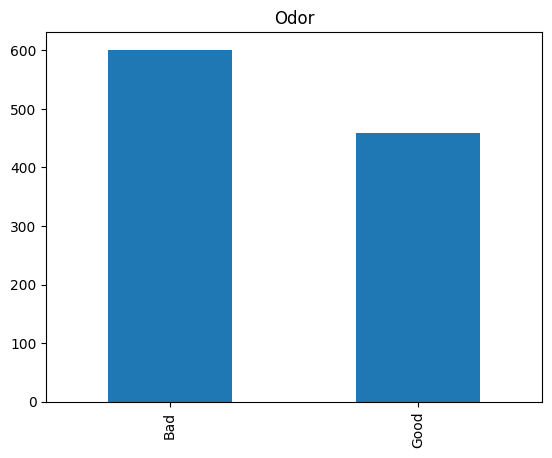

In [10]:
# Fitur Odor
feature = categorical_features[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
result = pd.DataFrame({'Total Sample':count, 'Percentage':percent.round(1)})
print(result)
count.plot(kind='bar', title=feature);



> Dari grafik diatas menunjukkan bahwa lebih dari 50% total susu yang terdapat pada dataset memiliki bau  yang kurang sedap atau tidak memenuhi standar. Haal ini menunjukkan bahwa rata-rata dari dataset yang diperoleh memiliki bau yang kurang sedap.



      Total Sample  Percentage
Good           711        67.1
Bad            348        32.9


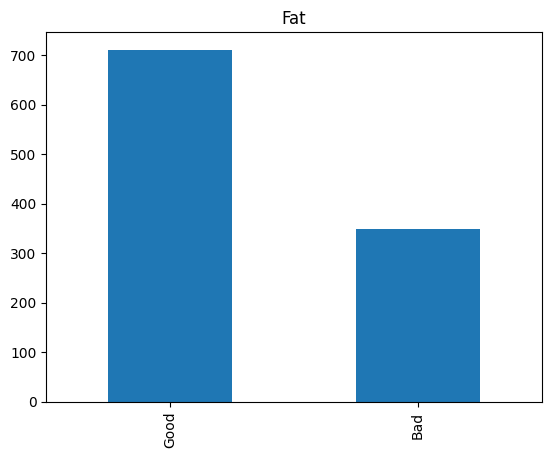

In [11]:
# Fitur Fat
feature = categorical_features[2]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
result = pd.DataFrame({'Total Sample':count, 'Percentage':percent.round(1)})
print(result)
count.plot(kind='bar', title=feature);



> Berdasarkan dari grafik diatas lebih dari 60% total dataset memiliki kadar lemak yang memenuhi standar. Yang berarti dari dataset yang diperoleh lebih dari 700 sample data telah memenuhi standar kadar lemak susu yang sehat.



      Total Sample  Percentage
Bad            539        50.9
Good           520        49.1


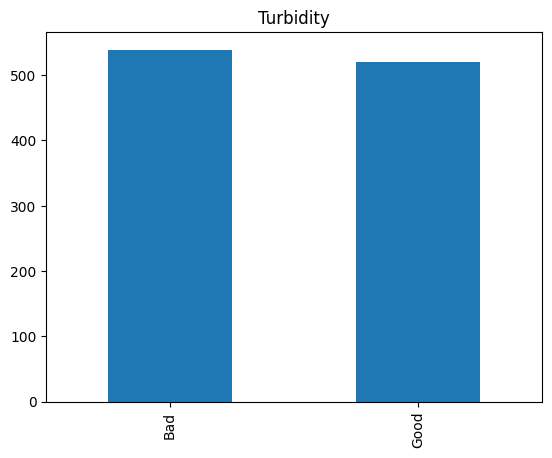

In [12]:
# Fitur Turbidity
feature = categorical_features[3]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
result = pd.DataFrame({'Total Sample':count, 'Percentage':percent.round(1)})
print(result)
count.plot(kind='bar', title=feature);



> Dari grafik diatas dapat disimpulkan bahwa perbandingan tingkat kekeruhan susu dari dataset cukup seimbang. Hal ini cukup bagus untuk menjadi pertimbangan model dalam proses training karena pembagian dataset yang seimbang.



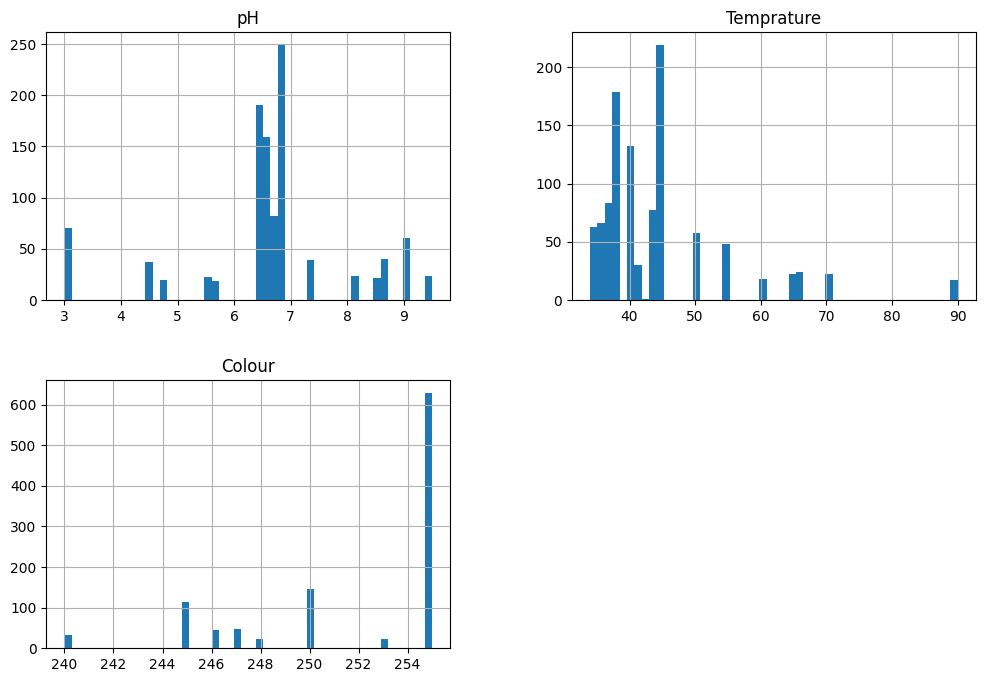

In [13]:
# Numerical Features
df.hist(bins=50, figsize=(12,8))
plt.show()



> Berdasarkan histogram diatas nilai frekuensi pH terbanyak berada diantara 6 hingga 7, lebih dari 60% data dari dataset memiliki suhi dibawah 50&deg;F, dan nilai tingkat warna susu didominasi dengan nilai 255. Dari grafik diatas dapat disimpulkan bahwa persebaran data numerical untuk fitur pH, Temprature, dan Colour tidak merata.



*   Multivariate Analysis

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   object 
 3   Odor        1059 non-null   object 
 4   Fat         1059 non-null   object 
 5   Turbidity   1059 non-null   object 
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 66.3+ KB


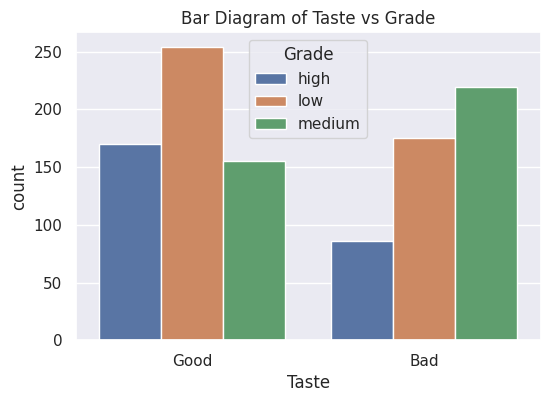

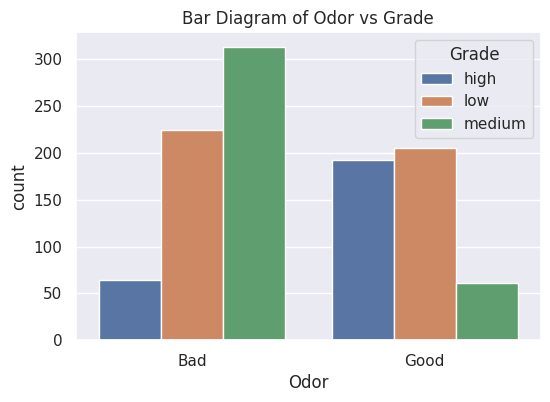

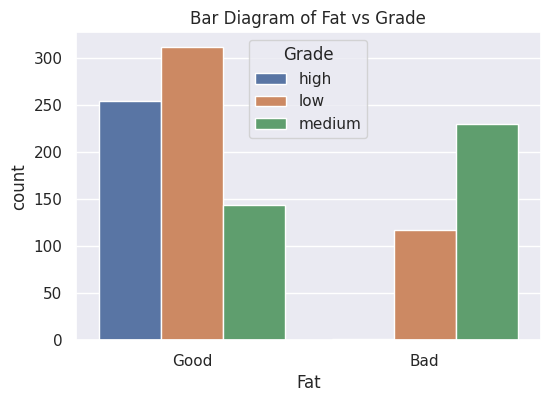

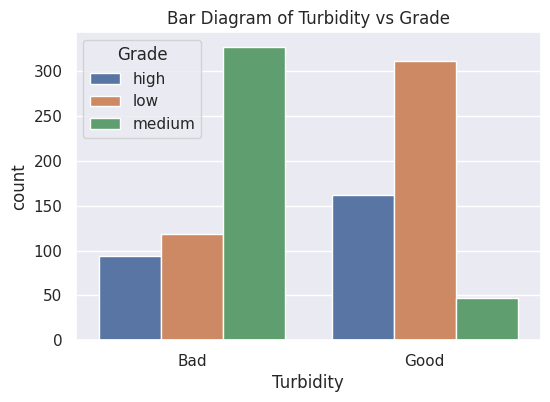

In [15]:
# Categorial Features
for col in categorical_features:
  sns.set(style="darkgrid")
  plt.figure(figsize=(6, 4))
  sns.countplot(data=df, x=col, hue="Grade")
  plt.title('Bar Diagram of {} vs {}'.format(col, 'Grade'))
  plt.legend(title="Grade")
  plt.show()



> Analisis multivariate digunakan dengan cara menggambarkan diagram batang dari keterkaitan antara fitur ketegorial pada dataset dan target kelas. Diagram tersebut menggambarkan jumlah pada setiap fitur dengan target kelas yaitu kualitas susu. Kesimpulan dari diagram diatas adalah:


*   Susu dengan rasa yang memenuhi standar(good) memiliki presentase kelas terbanyak di kualitas low, hal ini membuktikan bahwa kualitas susu tidak bergantung hanya pada rasa susu.
*   Bau susu dengan jumlah kelas yang mendominasi dataset diperoleh oleh bau yang tidak memenuhi standar dengan kelas kualitas susu medium, hal ini juga membutikan bahwa kulitas susu tidak bergantung hanya pada bau susu.
*   Untuk fitur fat pada dataset yang digambarkan dari grafik diatas dapat disimpulkan bahwa kualutas susu bergantung dari kadar lemak yang terdapat pada susu, tidak terdapatnya susu berkualitas tinggi(high) dengan kadar lemak yang buruk(bad) membuktikan bahwa kualitas susu dipengaruihi oleh kadar lemak pada susu. Pada fitur ini juga didominasi oleh susu dengan kadar lemak yang memenuhi standar.
*   Selanjutnya untuk fitur tingkat kekeruhan susu didominasi oleh tingkat kekeruhan yang tidak memenuhi standar memiliki kelas kualitas medium dan susu dengan tingkat kekeruhan memenuhi standar didominasi oleh kualitas low. Hal ini menunjukkan bahwa tingkat kekeruhan susu cukup berpengaruh dalam menentukan kualitas susu.







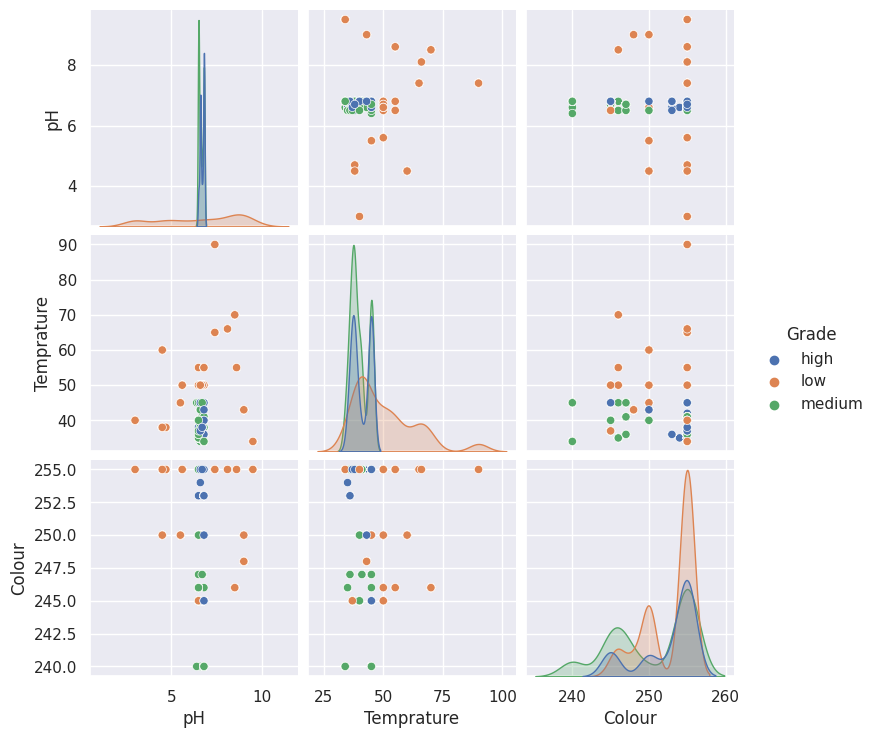

In [16]:
# Numerical Features
sns.pairplot(df, hue="Grade", diag_kind = 'kde')



> Untuk melakukan Multivariate Analysis pada fitur numerical saya menggunakan pairplot dengan kualitas susu sebagai warna plot. Dapat dilihat pada grafik plotting diatas bahwa peserbaran data dataset tidak merata untuk fitur categorial. Kualitas susu tinggi(high) dan menengah(medium) cenderung memiliki pesebaran data yang tidak berbeda jauh atau dapat disebut lebih cenderung berkumpul. Sementara itu untuk data dengan kualitas susu renda(low) cenderung memiliki data yang tersebar namun cenderung membentuk pola garis yang berarti data ini cenderung constant perubahan nilainya.



<ipython-input-17-2cd51d8e02a9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

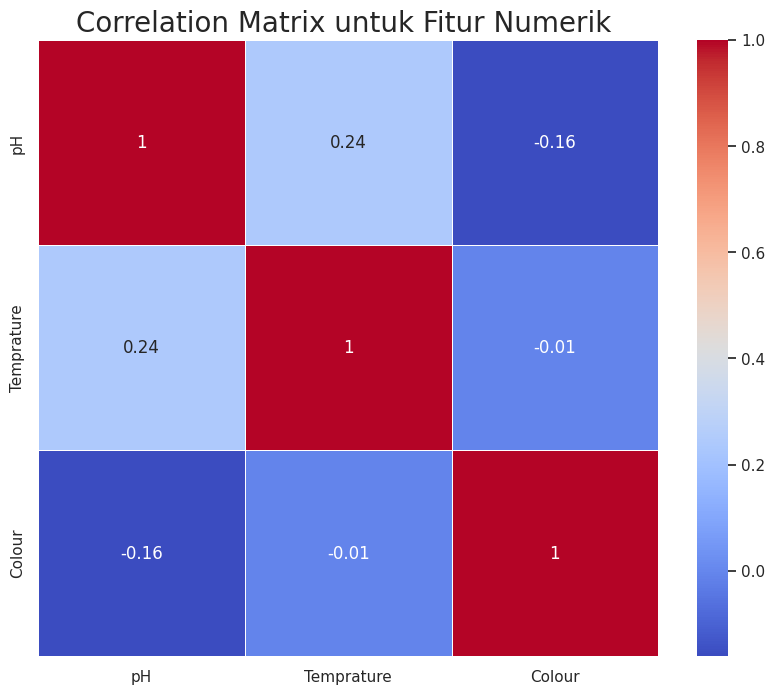

In [17]:
# Analisis Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)



> Dari hasil diagram heatmap diatas dapat dilihat bahwa setiap numerical fitur pada dataset memiliki korelasi yang rendah. Korelasi terendah dimiliki oleh fitur warna(colour). Namun agar model tetap dapat melakukan pelatihan dengan baik, maka fitur dengan korelasi terendah tidak akan dihilangkan pada studi kasus ini.



#**Data Preparation**

*   Missing Value

In [18]:
pH = (df.pH == 0).sum()
temprature = (df.Temprature == 0).sum()
colour = (df.Colour == 0).sum()
Turbidity = (df.Turbidity.isnull()).sum()
Fat = (df.Fat.isnull()).sum()
Odor = (df.Odor.isnull()).sum()
Taste = (df.Taste.isnull()).sum()
     
print("Nilai 0 di kolom pH ada: ", pH)
print("Nilai 0 di kolom temprature ada: ", temprature)
print("Nilai 0 di kolom colour ada: ", colour)
print("Nilai null di kolom Turbidity ada: ", Turbidity)
print("Nilai null di kolom Fat ada: ", Fat)
print("Nilai null di kolom Odor ada: ", Odor)
print("Nilai null di kolom Taste ada: ", Taste)

Nilai 0 di kolom pH ada:  0
Nilai 0 di kolom temprature ada:  0
Nilai 0 di kolom colour ada:  0
Nilai null di kolom Turbidity ada:  0
Nilai null di kolom Fat ada:  0
Nilai null di kolom Odor ada:  0
Nilai null di kolom Taste ada:  0




> Setelah dilakukan pengecekan tidak ada data yang bernilai 0 pada kolom setiap fitur pada dataset maka tidak perlu dilakukannya tahap preprocessing untuk menghilangkan data yang kosong atau null.



*   One Hot Encoding


In [19]:
df = pd.concat([df, pd.get_dummies(df['Taste'], prefix='Taste')],axis=1)
df = pd.concat([df, pd.get_dummies(df['Odor'], prefix='Odor')],axis=1)
df = pd.concat([df, pd.get_dummies(df['Fat'], prefix='Fat')],axis=1)
df = pd.concat([df, pd.get_dummies(df['Turbidity'], prefix='Turbidity')],axis=1)
df.drop(['Taste','Odor','Fat', 'Turbidity'], axis=1, inplace=True)
df.head()

,pH,Temprature,Colour,Grade,Taste_Bad,Taste_Good,Odor_Bad,Odor_Good,Fat_Bad,Fat_Good,Turbidity_Bad,Turbidity_Good
0,6.6,35,254,high,0,1,1,0,0,1,1,0
1,6.6,36,253,high,1,0,0,1,1,0,0,1
2,8.5,70,246,low,0,1,0,1,0,1,0,1
3,9.5,34,255,low,0,1,0,1,1,0,0,1
4,6.6,37,255,medium,1,0,1,0,1,0,1,0




> Proses one hot encoding tersebut dilakukan dengan tujuan merubah kembali fitur yang bernilai kategorial kembali menjadi numerical. Fitur yang diubah adalah rasa, suhu, bau, kadar lemak, dan kekeruhan.



*   Train-Test Spliting

In [20]:
X = df.drop(["Grade"],axis =1)
y = df["Grade"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [21]:
print(f'Total banyak sample data dari dataset: {len(X)}')
print(f'Total banyak sample yang digunakan sebagai data training: {len(X_train)}')
print(f'Total banyak sample yang digunakan sebagai data uji: {len(X_test)}')

Total banyak sample data dari dataset: 1059
Total banyak sample yang digunakan sebagai data training: 847
Total banyak sample yang digunakan sebagai data uji: 212




> Pembagian data training dan dataset dilakukan dengan rasio 20% digunakan sebagai data uji dan 80% sebagai data latih. Detail pembagian dataset dapat dilihat pada hasil kode diatas.



*   Data Normalization

In [22]:
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,pH,Temprature,Colour
652,0.129417,-0.312908,0.743339
764,1.408985,1.078863,0.743339
499,-0.083844,-0.710557,-1.593736
229,-1.505586,-0.611145,0.743339
182,-0.012757,-0.710557,0.743339


In [23]:
X_train[numerical_features].describe().round(4)

,pH,Temprature,Colour
count,847.0000,847.0000,847.0000
mean,0.0000,0.0000,-0.0000
std,1.0006,1.0006,1.0006
min,-2.5719,-1.0088,-2.7623
25%,-0.0838,-0.6111,-0.4252
50%,0.0583,-0.3129,0.7433
75%,0.1294,0.0847,0.7433
max,2.0488,4.5583,0.7433




> Pada tahapan ini dilakukan proses untuk melakukan normalisasi data. Proses ini dilakukan untuk menghasilkan model yang lebih akurat dan membentuk data agar memiliki range atau rentang data yang lebih kecil. Tahapan ini menormalisasi dataset pada kolom pH, suhu, dan warna. Algoritma normalisasi data yang digunakan adalah standard scaler.


# **Model Development**



> Pada tahapan ini dilakukan pembentukan model machine learning yang akan digunakan. Pada penelitian kali ini digunakanlah algoritma K-Nearest Neighbors(KNN) dan Random Forest(RF). Algoritma KNN digunakan karena ini adalah salah satu algoritma KNN yang mudah untuk dipahami dan diterapkan, selain itu model ini tidak memerlukan proses training yang lama hanya membandingkan jarak kemiripan data yang diuji dengan data training. Sementara itu RF digunakan karena algoritma ini merupakan algoritma yang banyak digunakan untuk melakukan proses klasifikasi, meskipun memiliki algoritma yang lebih rumit dari KNN. Di penelitian ini akan mencoba untuk membandingkan kedua algoritma tersebut manakah yang memiliki peforma terbaik berdasarkan akurasi tertinggi.


In [24]:
# Evaluation DataFrame
models = pd.DataFrame(index=['train_accuracy', 'test_accuracy'], columns=['KNN', 'RandomForest'])



*   KNN



In [25]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
     
models.loc['train_mse','KNN'] = accuracy_score(y_pred = knn.predict(X_train), y_true=y_train)



*   RF



In [26]:
RF = RandomForestClassifier(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = accuracy_score(y_pred=RF.predict(X_train), y_true=y_train)    

# **Evaluation**



> Tahapan ini adalah proses mengevaluasi model untuk memilih model terbaik berdasarkan akurasi tertinggi. Tahapan ini akan membandingkan akurasi kedua model bersadarkan akurasi data training dan data uji.



In [27]:
# Normalisasi data uji
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [28]:
# Accuracy DataFrame
accuracy = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF'])
     
# Model dictionary
model_dict = {'KNN': knn, 'RF': RF}
     
# Getting Accuracy
for name, model in model_dict.items():
  accuracy.loc[name, 'train'] = accuracy_score(y_true=y_train, y_pred=model.predict(X_train)) 
  accuracy.loc[name, 'test'] = accuracy_score(y_true=y_test, y_pred=model.predict(X_test))
     
# Show result
accuracy

,train,test
KNN,0.985832,0.976415
RF,1.0,1.0


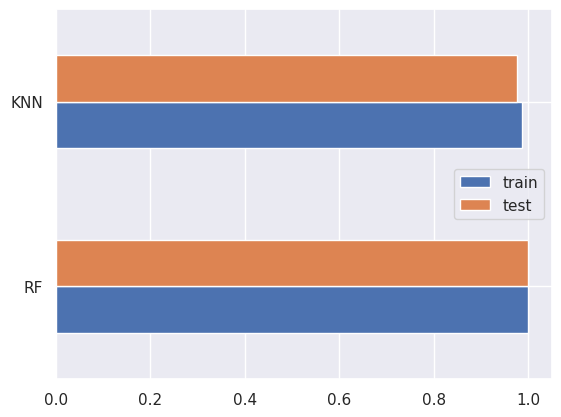

In [29]:
fig, ax = plt.subplots()
accuracy.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)



> Berdasarkan dari grafik tersebut didapatkan bahwa model dengan akurasi terbaik diperoleh oleh Random Forest. Model tersebut mendapatkan akurasi hingga 100% untuk data training dan data uji dari kualitas susu. 



In [30]:
# Implement Algorithm
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for index, model in model_dict.items():
  pred_dict['prediksi_'+index] = model.predict(prediksi)
     
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF
138,medium,medium,medium


In [31]:
# Export Model
filename = 'model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(RF, file)